<a href="https://colab.research.google.com/github/nmorado/adhoc/blob/master/fengshui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import requisite packages

In [0]:
import tensorflow as tf
import pickle

import os

from keras.preprocessing import image
import numpy as np

import cv2
import matplotlib.pyplot as plt


execution_path = os.getcwd()

# Load the training and test data

In [0]:
_training_X = pickle.load(open("training.X.pickle", "rb"))
_training_y = pickle.load(open("training.y.pickle", "rb"))
_test_X = pickle.load(open("test.X.pickle", "rb"))
_test_y = pickle.load(open("test.y.pickle", "rb"))

## data normalization

In [0]:
# image normalization
_training_X = _training_X / 255.0
_test_X = _test_X / 255.0

# Define and compile model

In [9]:
model = tf.keras.models.Sequential()


# first convolutional layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[500, 500, 3]))

# second convolutional layer and max pooling
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

# third convolutional layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

# fourth convolutional layer and max pooling
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

# flattening layer
model.add(tf.keras.layers.Flatten())

# first fully connected layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

print(model.summary())

# compile model
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

model.fit(_training_X, _training_y, epochs=8)

test_loss, test_accuracy = model.evaluate(_test_X, _test_y)

print("Test accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 500, 500, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 500, 500, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 250, 250, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 250, 250, 64)      18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 250, 250, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 125, 125, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1000000)          

In [26]:
# load model from GoogleDrive
# !pip install -U -q PyDrive
# import os
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # 1. Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)


model = tf.keras.models.load_model('/content/drive/My Drive/fengshui.6666.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Save model

In [0]:
# model.save('fengshui.6666.h5')

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Test model


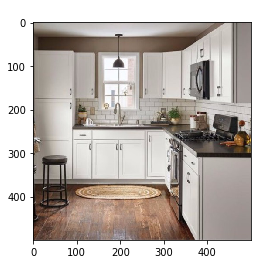

In [34]:
CATEGORIES = ["bedroom", "entrance", "kitchen", "living", "master", "study"]
IMG_RES = (500, 500)
# ------------------------
# in sample              |
# ------------------------
img = 'studyroom.jpg'
# img = 'livingroom.png'
# img = 'entrance.jpg'
# img = 'master.jpg'
# img = 'bedroom.jpg'
# img = 'kitchen-train.jpg'


# ------------------------
# not in sample          |
# ------------------------
# img = 'kitchen.png'

test_image = image.load_img(img, target_size=IMG_RES)

img_array = cv2.imread(img, cv2.IMREAD_COLOR)
new_array = cv2.resize(img_array, IMG_RES)

input = np.array(new_array).reshape(-1, IMG_RES[0], IMG_RES[1], 3)
input = input/255


result = model.predict_classes(input)
# print(CATEGORIES[result[0]])

plt.imshow(plt.imread(img))
plt.title(CATEGORIES[result[0]], color='w')
plt.show()